In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import uniform

In [2]:
df = pd.read_excel('D:\File_Analisa_Python\data_aging.xlsx')

In [3]:
df.describe()
plt.style.use('ggplot')

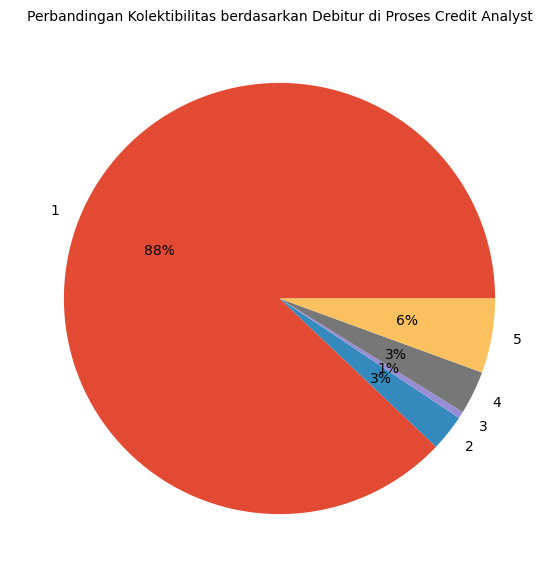

In [4]:
grup_norek = df[['NOREK','BIKOLE', 'TOTAL']]

grup_norek = grup_norek.groupby(['NOREK','BIKOLE']).sum()

grup_norek = grup_norek.reset_index()

pie = grup_norek[['NOREK','BIKOLE']].groupby('BIKOLE').count()

pie.plot(kind='pie', y='NOREK', autopct='%1.0f%%', figsize=(7,7), legend=False)
plt.title('Perbandingan Kolektibilitas berdasarkan Debitur di Proses Credit Analyst', fontsize=10)
plt.ylabel('')
plt.show()

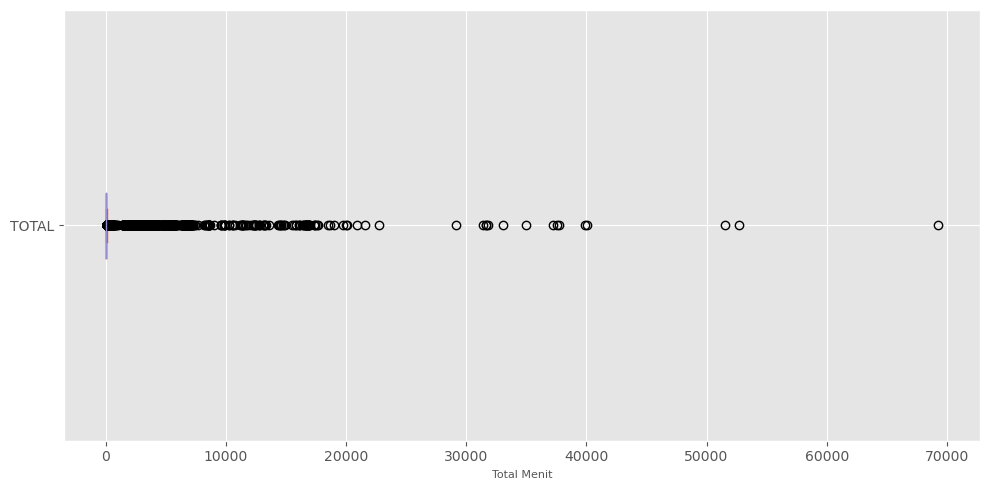

Data total menit proses Credit Analyst terlalu banyak nilai outliers (simpangan ekstrim)


In [5]:
df.plot(kind='box', y='TOTAL', vert=False, figsize=(10,5))
plt.xlabel('Total Menit', fontsize=8)
plt.tight_layout()
plt.show()

print('''Data total menit proses Credit Analyst terlalu banyak nilai outliers (simpangan ekstrim)''')

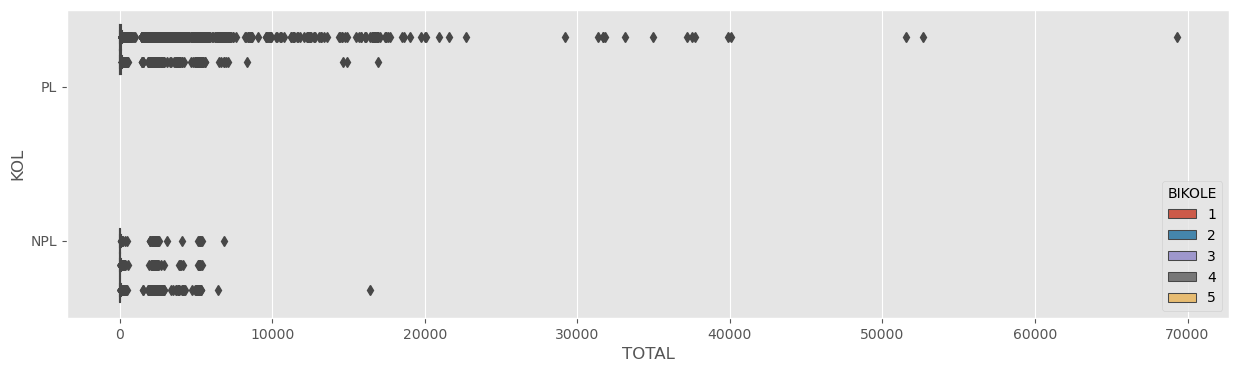

Berikut Outliers berdasarkan Kolektibilitas PL dan NPL


In [32]:
fig, ax = plt.subplots(figsize=(15, 4))


sns.boxplot(data=df, x="TOTAL",y="KOL", hue="BIKOLE", ax=ax)
plt.show()

print('Berikut Outliers berdasarkan Kolektibilitas PL dan NPL')

Total rata - rata menit 403.4
Standar Deviasi 1168.73


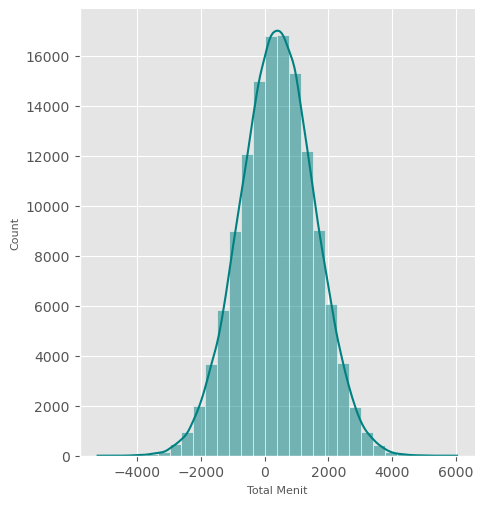

In [6]:
#Distribusi Normal untuk seluruh data PL dan NPL

mean_total = df['TOTAL'].mean()
stdev = df['TOTAL'].std(ddof=0)

print('Total rata - rata menit',round(mean_total,2))
print('Standar Deviasi',round(stdev,2))


data_norm = scipy.stats.norm.rvs(size= len(df['TOTAL']), loc=mean_total, scale=stdev)

sns.displot(data_norm,
            kde=True,
            bins=30,
            color='teal',
            alpha=0.5)
plt.xlabel('Total Menit', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.show()

In [7]:
kondisipl = df['BIKOLE'].isin([1,2])
kondisinpl = df['BIKOLE'].isin([3,4,5])

data_pl = df[kondisipl]
data_npl = df[kondisinpl]

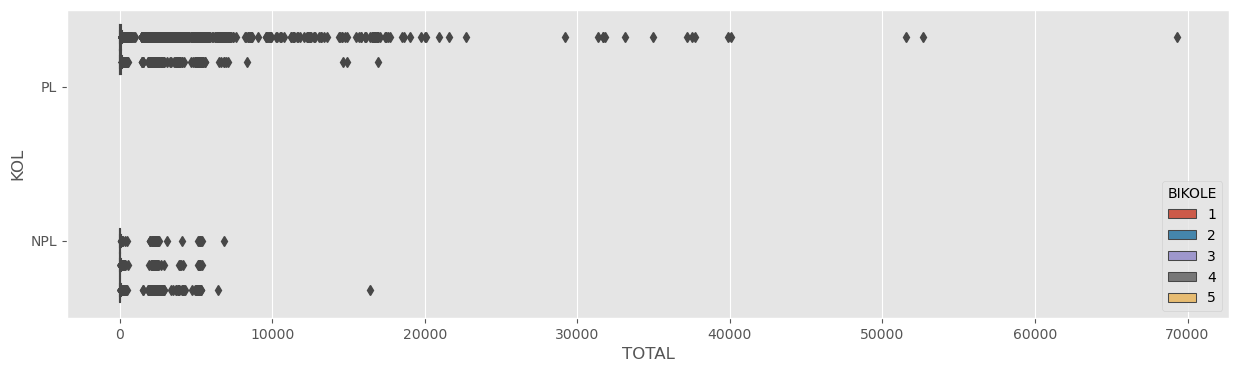

<Axes: xlabel='TOTAL', ylabel='BIKOLE'>

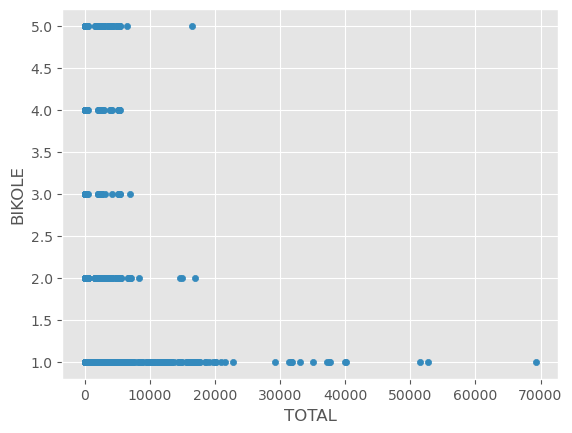

In [35]:

df.plot(kind='scatter', x='TOTAL', y='BIKOLE')